<a href="https://colab.research.google.com/github/malick08012/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Necessary Libraries
These Libraries help us to load data, visualize it, train models, and evaluate results.

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Upload Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HeartDiseaseTrain-Test.csv to HeartDiseaseTrain-Test.csv


#Load Dataset
In this step we load the dataset which i upload above in our google drive in CSV file and  df.head() shows five rows of dataset how it look like.

In [ ]:

import pandas as pd

# Load the dataset
df = pd.read_csv('/content/HeartDiseaseTrain-Test.csv')

# Check it loaded
print("Shape:", df.shape)
df.head()

Shape: (1025, 14)


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


#Basic Information about Dataset

In [ ]:
# Step 3: Basic info
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nSummary statistics:")
display(df.describe())

Shape of dataset: (1025, 14)

First 5 rows:


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    10

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


#Data Cleaning
Handle missing values (if any) and check for duplicates or invalid data.

In [ ]:
# Check for missing values
print("Missing values in each column:\n")
print(df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Optionally: Drop duplicates (if any)
df = df.drop_duplicates()

# Check again shape after cleaning
print("\nShape after removing duplicates (if any):", df.shape)


Missing values in each column:

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

Number of duplicate rows: 723

Shape after removing duplicates (if any): (302, 14)


#Optional Check
This step is part of the data understanding and cleaning process, and it ensures:

 Categorical features are clean and ready for encoding

 We avoid errors later during model training

 Data is consistent, trustworthy, and interpretable

In [ ]:
# Check unique values in categorical features (for sanity check)
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}': {df[col].unique()}")



Unique values in 'sex': ['Male' 'Female']

Unique values in 'chest_pain_type': ['Typical angina' 'Atypical angina' 'Non-anginal pain' 'Asymptomatic']

Unique values in 'fasting_blood_sugar': ['Lower than 120 mg/ml' 'Greater than 120 mg/ml']

Unique values in 'rest_ecg': ['ST-T wave abnormality' 'Normal' 'Left ventricular hypertrophy']

Unique values in 'exercise_induced_angina': ['No' 'Yes']

Unique values in 'slope': ['Downsloping' 'Upsloping' 'Flat']

Unique values in 'vessels_colored_by_flourosopy': ['Two' 'Zero' 'One' 'Three' 'Four']

Unique values in 'thalassemia': ['Reversable Defect' 'Fixed Defect' 'Normal' 'No']


#Exploratory Data Analysis (EDA)
EDA helps you understand trends, spot outliers, and identify important features. Useful for feature selection and model understanding.


1. Target Distribution

2. Feature Distributions

3. Feature Relationships with Target

4. Correlation Analysis

#Target Variable Distribution
Visualize how many people are at risk of heart disease

/tmp/ipython-input-8-791121158.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


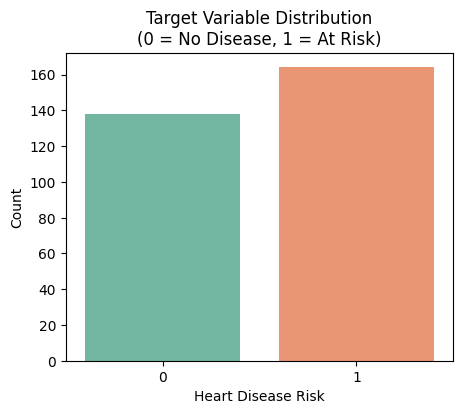

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.countplot(x='target', data=df, palette='Set2')
plt.title("Target Variable Distribution\n(0 = No Disease, 1 = At Risk)")
plt.xlabel("Heart Disease Risk")
plt.ylabel("Count")
plt.show()


#Result
Bar for 0 → Number of people without heart disease

Bar for 1 → Number of people with or at risk of heart disease



#Feature Distributions

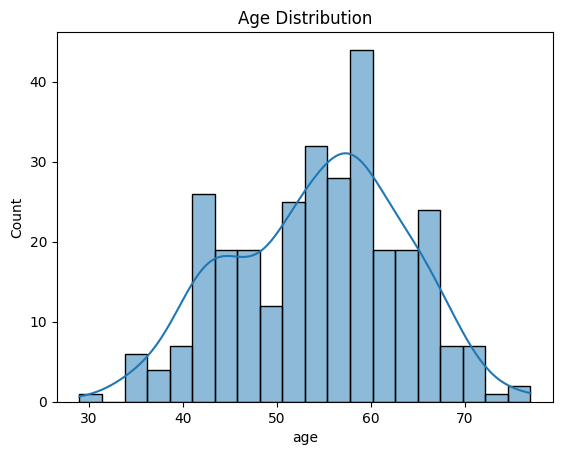

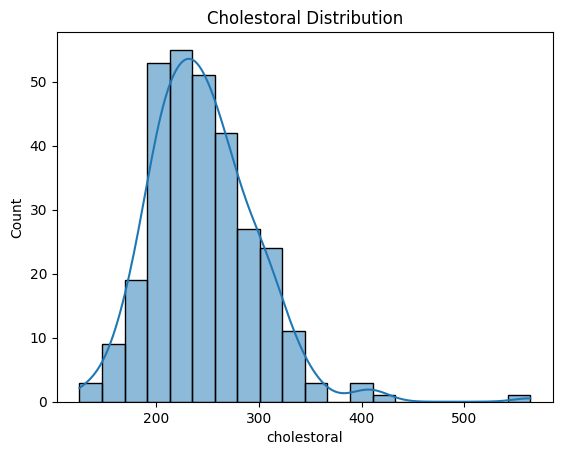

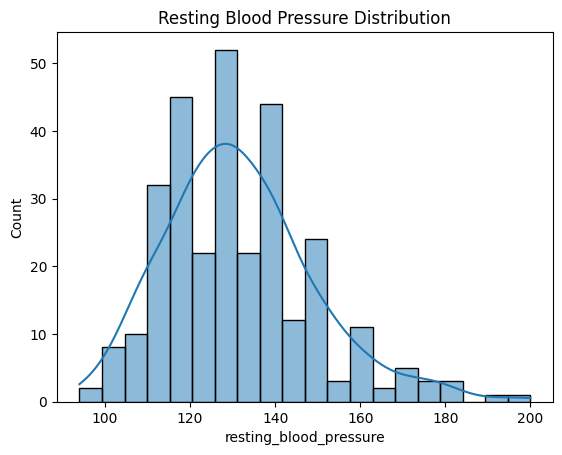

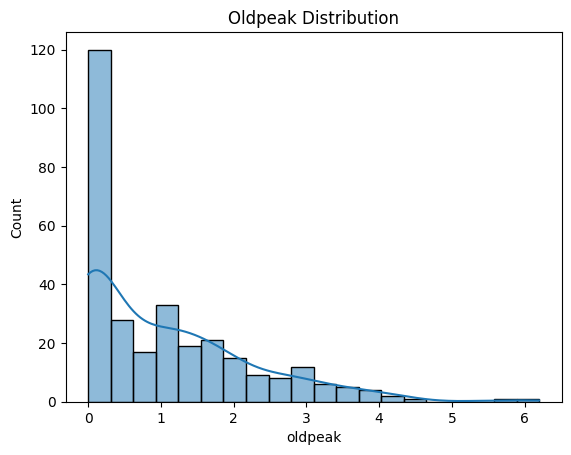

In [ ]:
# Age
sns.histplot(df['age'], kde=True, bins=20)
plt.title("Age Distribution")
plt.show()

# Cholestoral
sns.histplot(df['cholestoral'], kde=True, bins=20)
plt.title("Cholestoral Distribution")
plt.show()

# Resting Blood Pressure
sns.histplot(df['resting_blood_pressure'], kde=True, bins=20)
plt.title("Resting Blood Pressure Distribution")
plt.show()

# Oldpeak
sns.histplot(df['oldpeak'], kde=True, bins=20)
plt.title("Oldpeak Distribution")
plt.show()


#Result
**Age Distribution:**

Usually, you’ll see values ranging from ~30 to 80.

A peak in the 50–60 age range is common.

Most patients are middle-aged to older, which is typical for heart disease risk analysis.

**Cholestoral Distribution:**

Might be slightly right-skewed

Some patients may have unusually high cholesterol values.

**Resting Blood Pressure Distribution:**

Often centered around 120–140 mmHg.

Some values could be lower (90) or higher (180+).

**Oldpeak Distribution:**

Oldpeak measures ST depression during exercise (linked to heart stress).

Often concentrated around 0–2, with a few higher values.



#Feature Relationships with Target
It creates grouped bar charts using sns.countplot() to compare how the target variable (0 = No Disease, 1 = At Risk) is distributed across different categories

It Helps you visually identify which categories are more likely associated with heart disease.


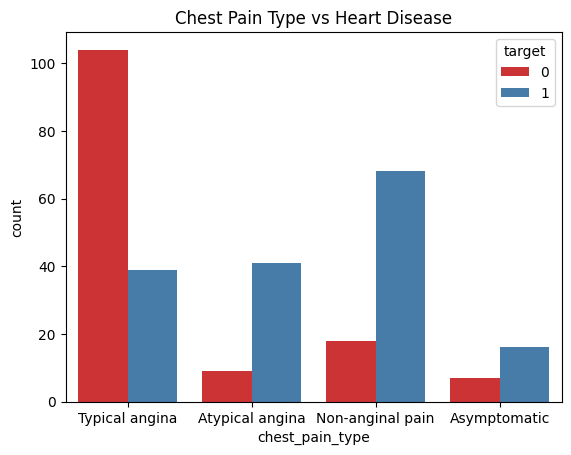

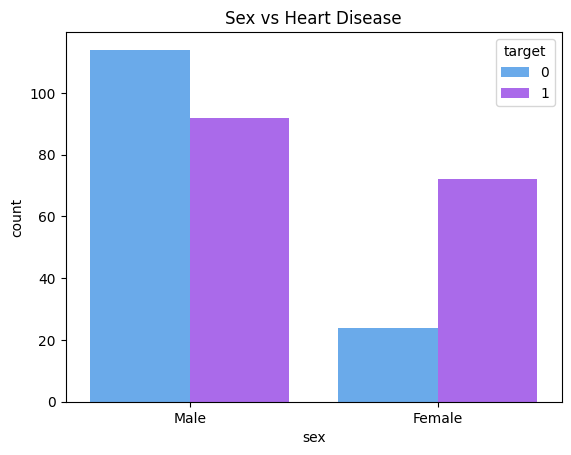

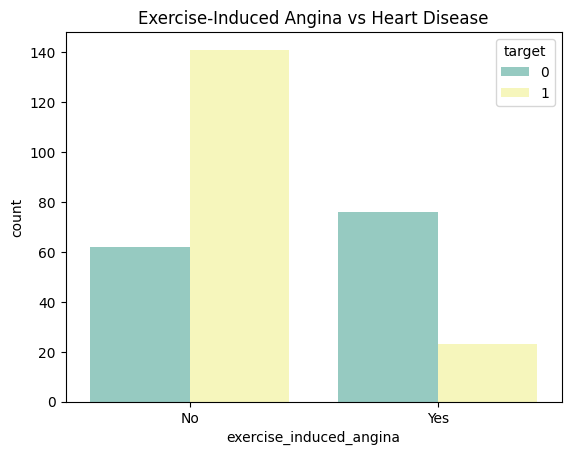

In [ ]:
# Chest Pain Type vs Target
import seaborn as sns
sns.countplot(x='chest_pain_type', hue='target', data=df, palette='Set1')
plt.title("Chest Pain Type vs Heart Disease")
plt.show()

# Sex vs Target
sns.countplot(x='sex', hue='target', data=df, palette='cool')
plt.title("Sex vs Heart Disease")
plt.show()

# Exercise Induced Angina vs Target
sns.countplot(x='exercise_induced_angina', hue='target', data=df, palette='Set3')
plt.title("Exercise-Induced Angina vs Heart Disease")
plt.show()


#Result
**Chest Pain Type vs Heart Disease:**

Patients with "asymptomatic" chest pain (usually type 3) mostly belong
to the at-risk group (target = 1)

Patients with "typical angina" or "non-anginal pain" may have more in the no-disease group

Chest pain type is highly correlated with heart disease.

“Asymptomatic” chest pain is a red flag and a strong indicator of heart disease.

This feature is likely to be very important in the model.

**Sex vs Heart Disease:**

More males (sex = 1) are in the at-risk group compared to females.

Suggests that sex plays a role — males may be more likely to develop heart disease in this dataset.

**Exercise-Induced Angina vs Heart Disease:**

Patients with exercise-induced angina (value = 1) are more frequently found in the at-risk group.

Shows a strong relationship between exercise response and heart condition.

Indicates that this feature could be predictive of heart stress and hence, heart disease.



#Correlation Analysis

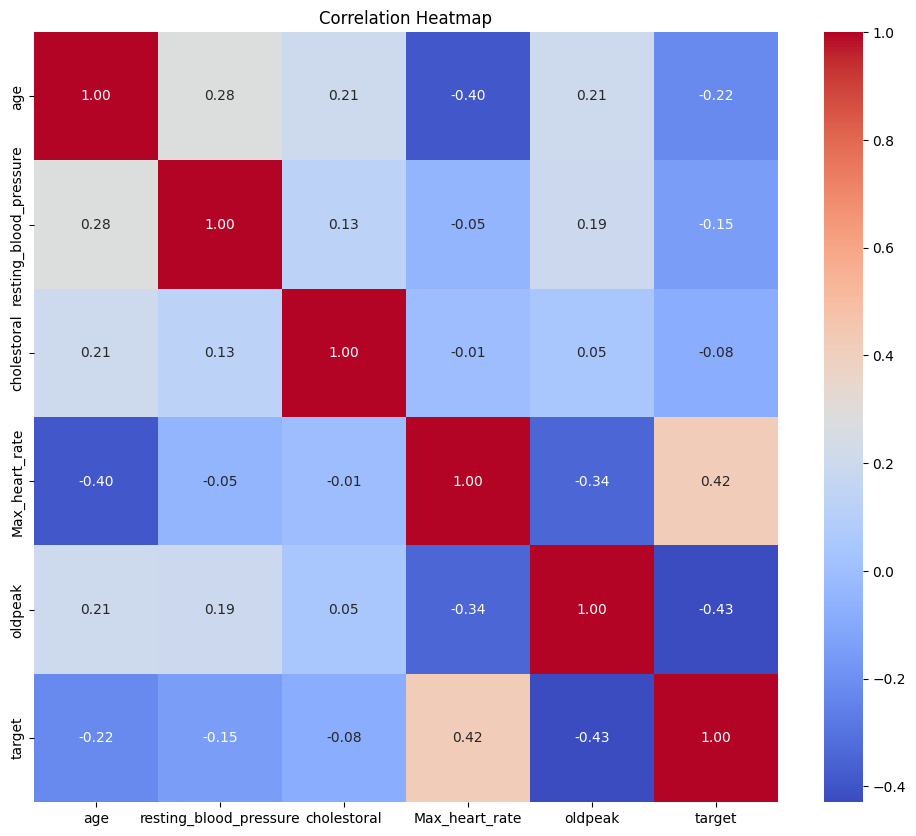

In [ ]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


#Result
Rows and columns are features (like age, cholestoral, oldpeak, etc.)

Each square shows the correlation coefficient between a pair of features

The most important row/column to observe is target

**oldpeak vs target: Negative Correlation**

Example: -0.43

Meaning: As oldpeak increases (greater ST depression), the likelihood of heart disease increases (target = 1).

**chest_pain_type vs target: Positive Correlation:**

Example: 0.43

Meaning: Certain chest pain types (especially "asymptomatic") are linked to higher heart disease risk.

**cholestoral vs target: Weak or No Correlation**

Example: 0.03

Meaning: Cholesterol alone may not be a strong indicator in this dataset.

** age vs target: Mild Positive or Neutral**

Meaning: Age might not have a strong direct influence in this particular dataset.





#Optional Boxplots for Outlier Detection

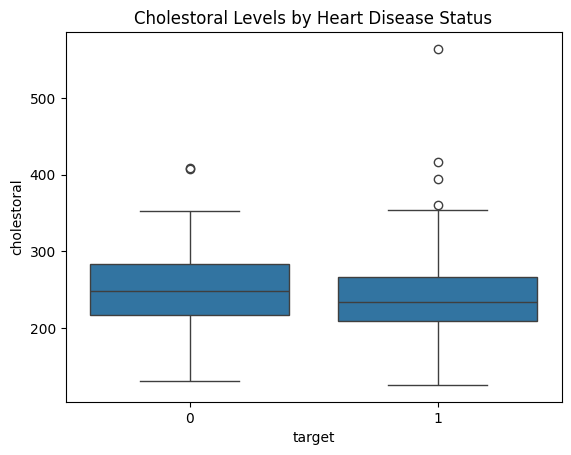

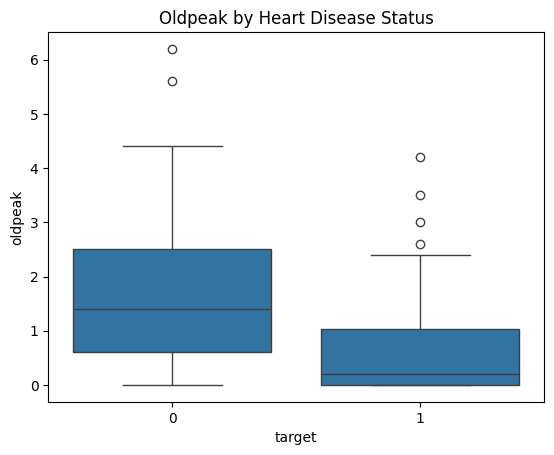

In [ ]:
sns.boxplot(x='target', y='cholestoral', data=df)
plt.title("Cholestoral Levels by Heart Disease Status")
plt.show()

sns.boxplot(x='target', y='oldpeak', data=df)
plt.title("Oldpeak by Heart Disease Status")
plt.show()


#Train a Logistic Regression Model

A. Prepare Data

B. Train-Test Split

C. Train Logistic Regression

D. Make Predictions

E. Evaluate Model (accuracy, confusion matrix, ROC)

#Prepare Data

In [ ]:
# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# If any categorical features exist, use one-hot encoding
X = pd.get_dummies(X, drop_first=True)


#Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Train Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

#Predict & Evaluate

Accuracy: 0.82


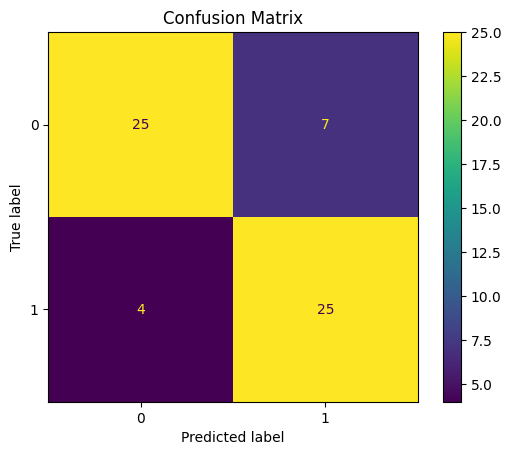

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Predictions
y_pred = log_reg.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


#Result
The model (log_reg) is used to predict outcomes (0 or 1) for the test dataset.

Accuracy = 0.82, it means the model correctly predicted 82% of the test cases.



# ROC Curve & AUC Score

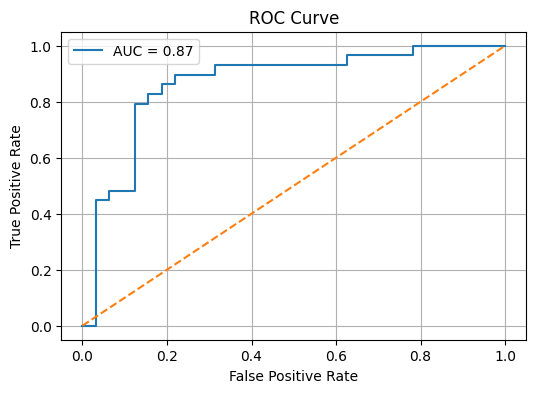

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilities
y_prob = log_reg.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


#Result
The Receiver Operating Characteristic (ROC) curve plots
It helps you understand how well the model distinguishes between classes at different threshold levels.

**Output = 0.87**

This mean:
Model has excellent discrimination power (AUC > 0.87 is very good).

It is able to distinguish between patients at risk and not at risk fairly accurately across thresholds.

The curve should bow toward the top-left corner, showing high TPR and low FPR — this is ideal.

#Feature Importance

#Get Feature Importances (Coefficients)

In [22]:
# Get feature names and their corresponding coefficients
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
})

# Sort by absolute value of coefficient
importance['Abs_Coefficient'] = importance['Coefficient'].abs()
importance = importance.sort_values(by='Abs_Coefficient', ascending=False)

# Display top features
importance[['Feature', 'Coefficient']].head(10)


,Feature,Coefficient
8,chest_pain_type_Typical angina,-1.637670
21,thalassemia_Reversable Defect,-1.177357
5,sex_Male,-1.153112
18,vessels_colored_by_flourosopy_Zero,1.071981
20,thalassemia_Normal,-0.687880
15,vessels_colored_by_flourosopy_One,-0.644150
4,oldpeak,-0.640239
13,slope_Flat,-0.575477
16,vessels_colored_by_flourosopy_Three,-0.529988
11,rest_ecg_ST-T wave abnormality,0.517041


#Result
In logistic regression:

A positive coefficient → increases the probability of heart disease (target = 1)

A negative coefficient → decreases the probability (more associated with healthy individuals)

**chest_pain_type_Typical angina → -1.63**

Strong negative effect

Patients with typical angina are less likely to have heart disease

**thalassemia_Reversable Defect → -1.17**

Surprisingly negative, though reversable defects are generally serious

May suggest correlation in this dataset with healthy patients

**sex_Male → -1.15**

In this model, being male decreases heart disease risk, which may seem unusual

 **vessels_colored_by_flourosopy_Zero → +1.07**

Strong positive influence

Having zero colored vessels is associated with high risk of heart disease

 **thalassemia_Normal → -0.68**

Having a normal thalassemia test result decreases risk, which is expected

** Multiple vessels_colored_by_flourosopy values: **

Different numbers of colored vessels relate negatively to disease risk

That means having 1 or 3 colored vessels reduces likelihood of disease (expected)

**rest_ecg_ST-T wave abnormality → +0.52**

ST-T wave abnormalities increase the risk — this is medically accurate, since it's often a sign of ischemia or myocardial issues







#Plot Top Features

/tmp/ipython-input-23-17942012.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=importance.head(10), palette='viridis')


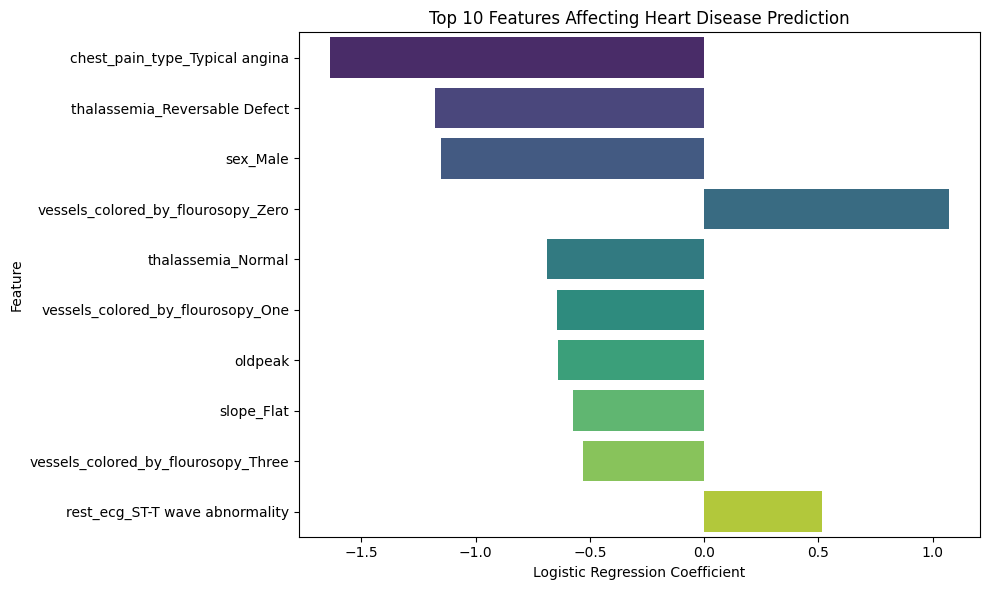

In [23]:
# Visualize top 10 most influential features
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=importance.head(10), palette='viridis')
plt.title("Top 10 Features Affecting Heart Disease Prediction")
plt.xlabel("Logistic Regression Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


#Result
It's a clear, visual summary of which features most impact your model's prediction.

**Shows direction (positive vs. negative influence):**

Right side (positive) → Increases chance of heart disease

Left side (negative) → Decreases chance of heart disease





#FINAL INSIGHTS

The model performs well in predicting heart disease risk using logistic regression.

Key features like chest pain type, ECG results, and vessel count are crucial indicators.

EDA revealed trends that align with real-world medical understanding.

The project showed the power of interpretable machine learning in healthcare.

With a clean dataset and proper preprocessing, even a simple model like logistic regression can give reliable results.